# Задание 7

In [81]:
import numpy as np
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
from typing import Callable, List
from functools import lru_cache
import pandas as pd
from random import uniform as rnd
import scipy.integrate as integrate
from scipy.misc import derivative

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Вариант 10
#### $y'(x) = -3y(x) + y^2(x);~y(0) = 1;~h=0.1;~N=10$

In [70]:
def f(* x: float, y: float) -> float:
    return -3 * y + y**2

### Общее решение дифференциального уравнения
#### $y(x) = \displaystyle\frac{3}{e^{c_1 + 3x}+1}$
### Решение задачи Коши с начальными данными $y(0)=1$
#### $y(x) = \displaystyle\frac{3}{2e^{3x}+1}$

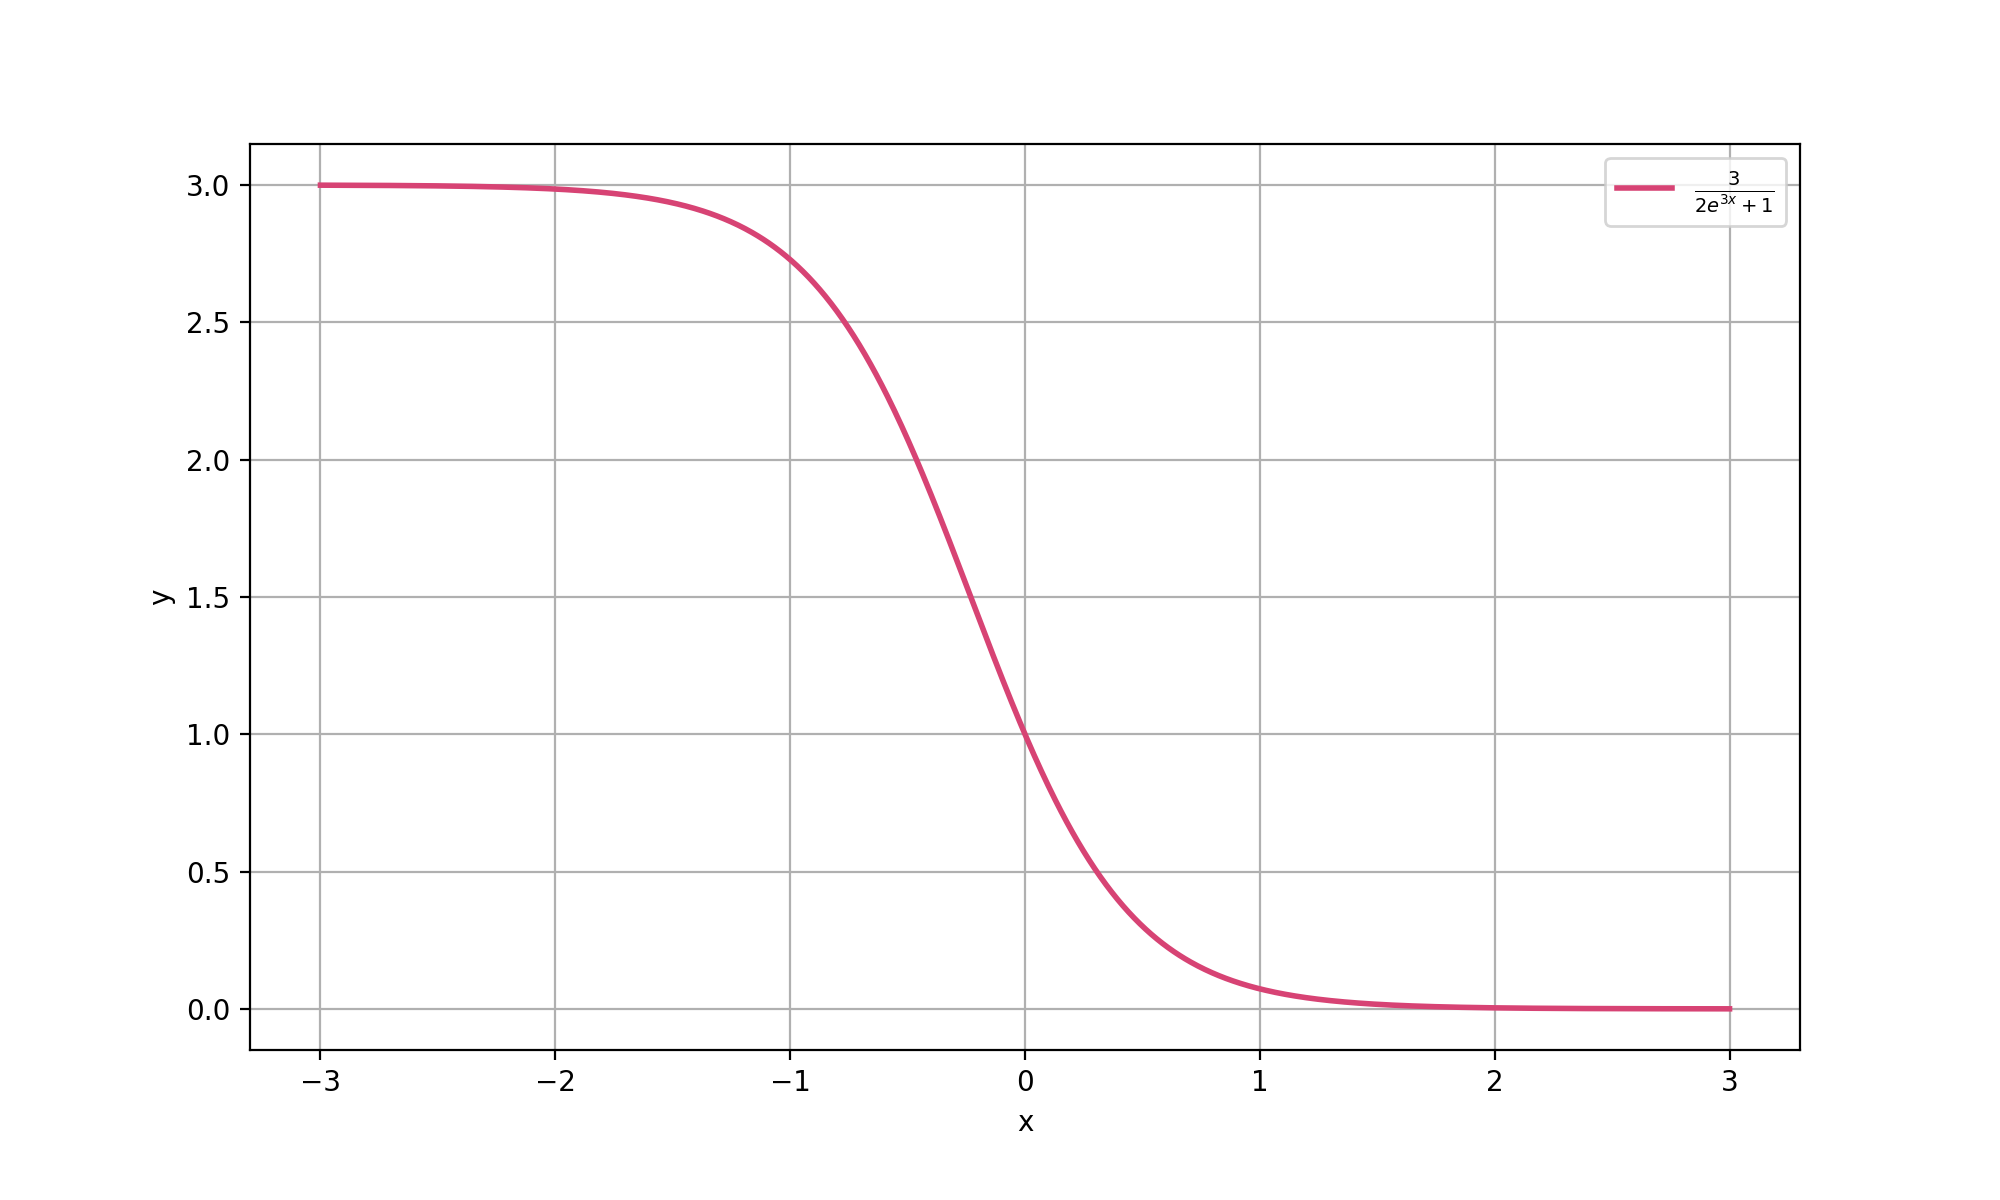

In [5]:
# Решение задачи Коши
expected_solution = lambda x: 3 / (2 * np.exp(3*x) + 1)
# Вывод графика
X = np.linspace(-3, 3, 1000)
Y = [expected_solution(x) for x in X]
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
ax.plot(X, Y, color='#d74374', linewidth=2, label=r'$\frac{3}{2e^{3x}+1}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

### 1) Найти точное решение. Вывести на печать таблицу значений точного решения в равноотстоящих с шагом $h$ точках $x_k = x_0+kh$, где $k= ‒2, ‒1, 0,\dots, N$; здесь $N$ и $h$ − параметры задачи.

In [27]:
# параметры задачи
# h = 0.1
# N = 10
h = float(input('Введите h'))
N = int(input('Введите N'))
x0 = 0
# таблица
def nodes_table(index: int) -> pd.DataFrame:
    data = {'Nodes': [x0 + k*h for k in range(index, N+1)]}
    return pd.DataFrame(data, index=[f'X{i}' for i in range(index, N+1)])
# таблица
def solution_table(index: int) -> pd.DataFrame:
    data = {'Solution': [str(expected_solution(x0 + k*h)) for k in range(index, N+1)]}
    return pd.DataFrame(data, index=[f'X{i}' for i in range(index, N+1)])
# вывод
expected_results = pd.concat([nodes_table(-2), solution_table(-2)], axis=1)
expected_results

,Nodes,Solution
X-2,-0.2,1.4301900821641191
X-1,-0.1,1.2088797335486299
X0,0.0,1.0
X1,0.1,0.8108726968008725
X2,0.2,0.6459617827252189
X3,0.3,0.5068247138764593
X4,0.4,0.39265813856961007
X5,0.5,0.30110269405035506
X6,0.6,0.22901995995206542
X7,0.7,0.17308684403068364


### 2) Методом разложения в ряд Тейлора (можно ограничиться пятью ненулевыми слагаемыми) найти и вывести на печать значения приближённого решения в точках $x_k = x_0+kh$, где $k= ‒2, ‒1, 0,\dots, N$.
### 3) Во всех точках $x_k= x_0+kh$, где $k= ‒2, ‒1, 0,\dots, N$ вывести на печать значения абсолютной погрешности метода разложения в ряд Тейлора.
#### Вычисление $\displaystyle\sum\limits_{i=0}^5 \frac{y^{(i)}(x_0)}{i!}(x-x_0)^i$
#### $y(0) = 1$
#### $y'(0) = -3y + y^2 \bigg|_{x=0} = -2$
#### $y^{(2)}(0) = (2y - 3)y' \bigg|_{x=0} = 2$
#### $y^{(3)}(0) = (2y - 3)y'' + 2{y'}^2 \bigg|_{x=0} = 6$
#### $y^{(4)}(0) = (2y - 3)y^{(3)} + 6y'y'' \bigg|_{x=0} = -30$
#### $y^{(5)}(0) = (2y - 3)y^{(4)} + 6{y''}^2 + 8y^{(3)}y' \bigg|_{x=0} = -42$

In [71]:
# y^(i)
derivatives = [1, -2, 2, 6, -30, -42]
#sum
@lru_cache(maxsize=6)
def factorial(n: int) -> int:
    if n == 1 or n == 0:
        return 1
    return n * factorial(n-1)
taylor_series = lambda x: np.sum([derivatives[i] / factorial(i) * (x - x0)**i for i in range(6)])
# таблица
def taylor_table(index: int) -> pd.DataFrame:
    data = {
        'Taylor': [str(taylor_series(x0 + k*h)) for k in range(index, N+1)],
        'Taylor Error': [str(abs(taylor_series(x0 + k*h) - expected_solution(x0 + k*h))) for k in range(index, N+1)]
            }
    return pd.DataFrame(data, index=[f'X{i}' for i in range(index, N+1)])
# вывод
n = -2
taylor_results = pd.concat([nodes_table(n), solution_table(n), taylor_table(n)], axis=1)
taylor_results

,Nodes,Solution,Taylor,Taylor Error
X-2,-0.2,1.4301900821641191,1.4301119999999998,7.808216411930857e-05
X-1,-0.1,1.2088797335486299,1.2088785000000002,1.2335486296866094e-06
X0,0.0,1.0,1.0,0.0
X1,0.1,0.8108726968008725,0.8108715,1.1968008725160573e-06
X2,0.2,0.6459617827252189,0.645888,7.378272521885165e-05
X3,0.3,0.5068247138764593,0.5060244999999999,0.0008002138764594546
X4,0.4,0.39265813856961007,0.388416,0.004242138569610088
X5,0.5,0.30110269405035506,0.2859375,0.015165194050355046
X6,0.6,0.22901995995206542,0.1867839999999999,0.04223595995206553
X7,0.7,0.17308684403068364,0.07405049999999994,0.0990363440306837


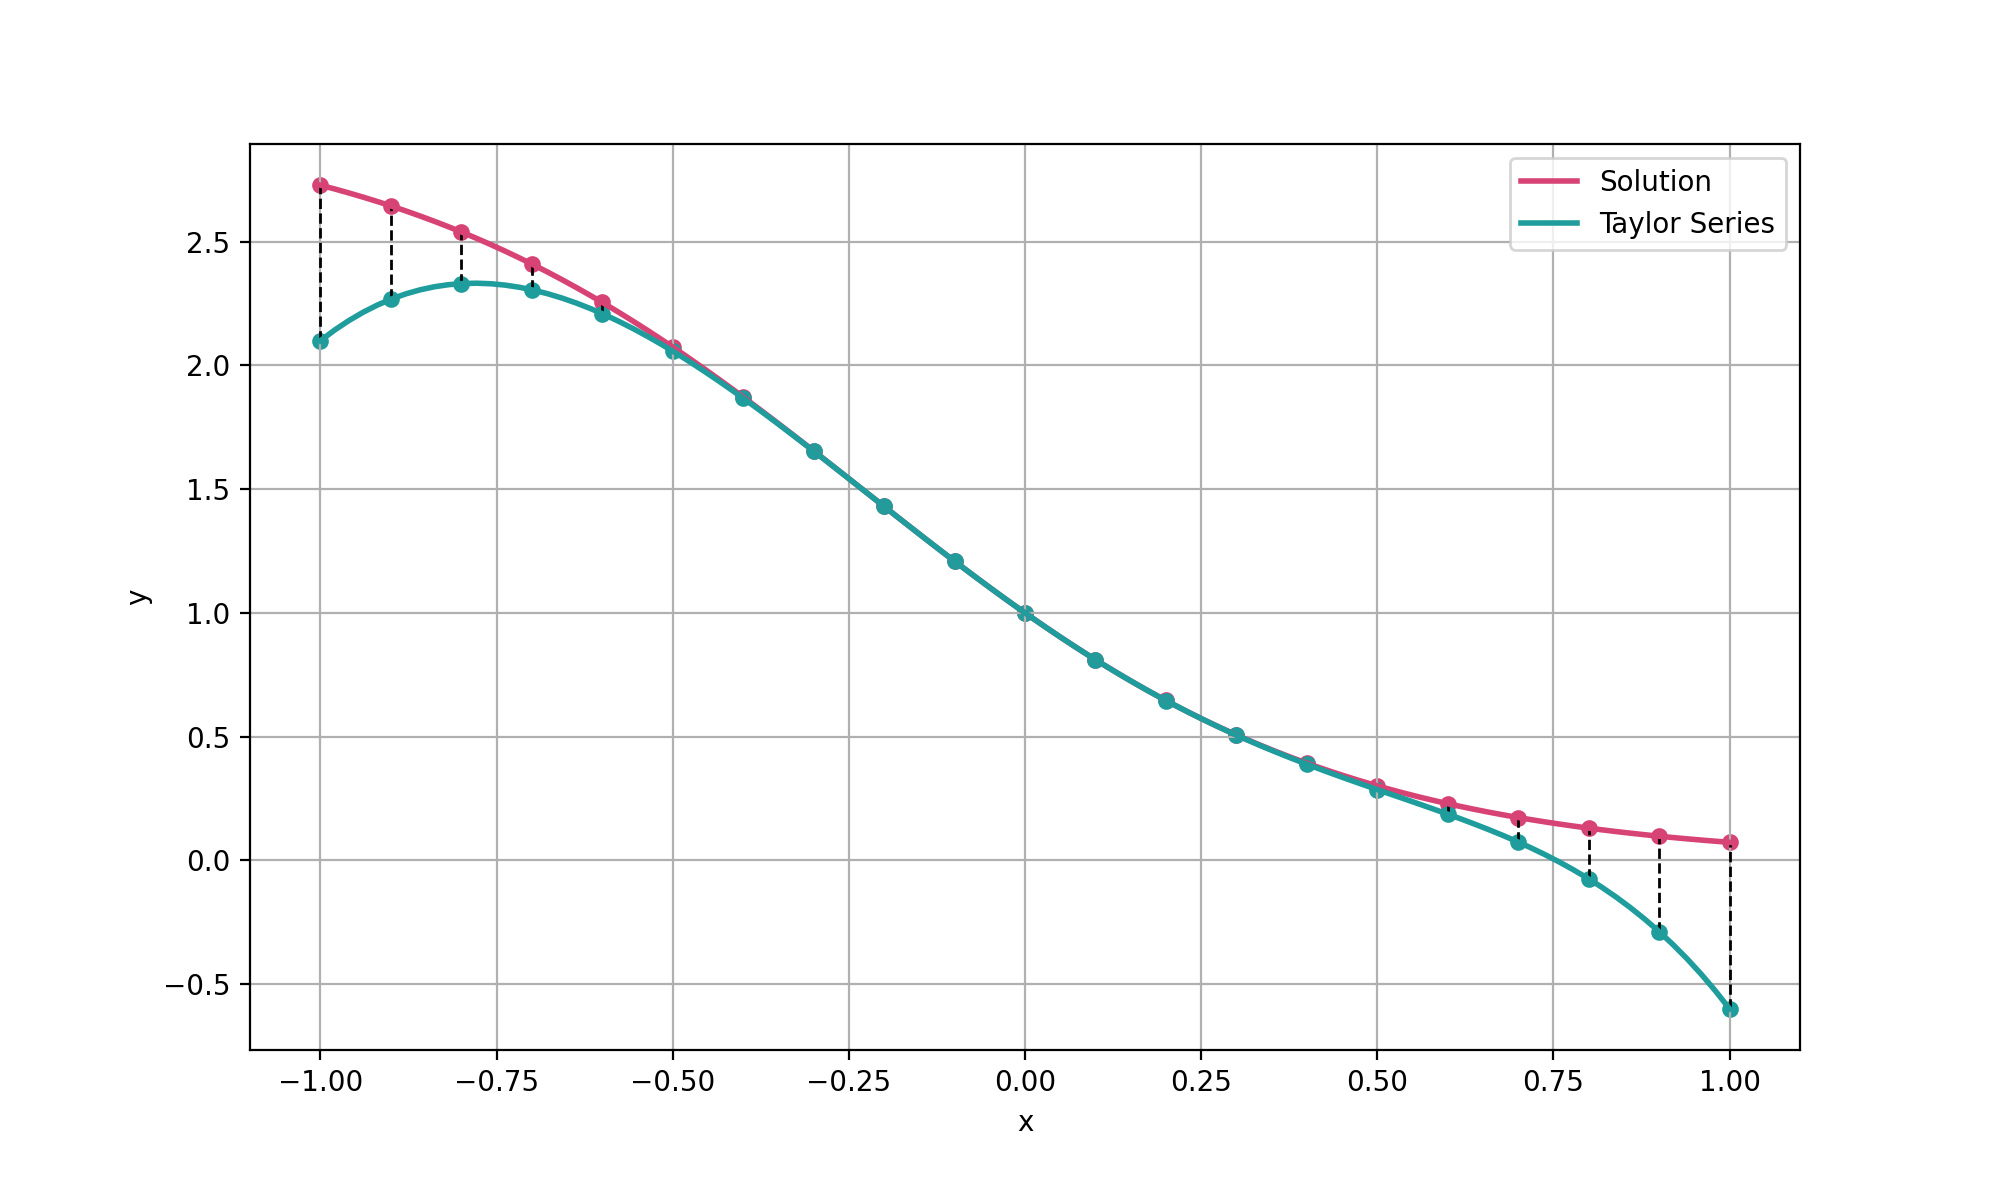

In [44]:
# вывод графика
X = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
ax.plot(X, [expected_solution(x) for x in X], color='#d74374', alpha=1, linewidth=2, label='Solution')
ax.plot(X, [taylor_series(x) for x in X], color='#1e9d9c', alpha=1, linewidth=2, label='Taylor Series')
Xk = nodes_table(-N)['Nodes']
ax.vlines(Xk, [min(taylor_series(x), expected_solution(x)) for x in Xk], [max(taylor_series(x), expected_solution(x)) for x in Xk], color='black', linewidth=1, alpha=1, linestyles='dashed')
ax.scatter(Xk, [expected_solution(x) for x in Xk], color='#d74374', s=25)
ax.scatter(Xk, [taylor_series(x) for x in Xk], color='#1e9d9c', s=25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

### 4) Вывести на печать значения приближённого решения, полученного экстраполяционным методом Адамса 4-го порядка в точках $x_k = x_0+kh$, где $k=3,4,\dots,N$.

In [98]:
def divided_differences(values: List[float]) -> List[List[float]]:
    res = [values]
    for i in range(1, 5):
        lst = [res[i-1][j+1] - res[i-1][j] for j in range(len(res[i-1])-1)]
        res.append(lst)
    return res
nodes = list(nodes_table(-2)['Nodes'][:5])
values = [float(x) for x in solution_table(-2)['Solution'][:5]]
eta_lst = [h * f(y=values[i]) for i in range(len(nodes))]
dd = divided_differences(eta_lst)
c = [1., 1 / 2, 5 / 12, 3 / 8, 251 / 720]
new_value = values[-1] + sum([dd[i][-1] * c[i] for i in range(0, 5)])
values.append(new_value)
nodes.append(nodes[-1] + h)
for i in range(6, N + 3):
    temp = h * f(y=values[-1])
    dd[0].append(temp)
    for j in range(1, 5):
        dd[j].append(dd[j-1][-1] - dd[j-1][-2])
    new_value = values[-1] + sum([dd[i][-1] * c[i] for i in range(0, 5)])
    values.append(new_value)
    nodes.append(nodes[-1] + h)
def adams_table(index: int) -> pd.DataFrame:
    expected = [float(x) for x in solution_table(-2)['Solution']]
    data = {
        'Adams': [str(x) for x in values[index+2:]],
        'Adams Error': [str(abs(values[i] - expected[i])) for i in range(index+2, N+3)]
    }
    return pd.DataFrame(data, index=[f'X{i}' for i in range(index, N+1)])
n = 3
adams_results = pd.concat([nodes_table(n), solution_table(n), adams_table(n)], axis=1)
adams_results

,Nodes,Solution,Adams,Adams Error
X3,0.3,0.5068247138764593,0.5065786612781199,0.00024605259833943016
X4,0.4,0.39265813856961007,0.39239367962086474,0.0002644589487453275
X5,0.5,0.30110269405035506,0.3007690754397071,0.0003336186106479566
X6,0.6,0.22901995995206542,0.22889030757091167,0.00012965238115375533
X7,0.7,0.17308684403068364,0.1729335339470952,0.00015331008358843157
X8,0.8,0.1301724412133385,0.13027286265990817,0.00010042144656965957
X9,0.9,0.09753096002150209,0.09745314156706898,7.781845443310953e-05
X10,1.0,0.07286669303778961,0.07310361580815686,0.00023692277036724274


### 5) Методом Рунге-Кутты 4-го порядка найти и вывести на печать значения приближённого решения в точках $x_k = x_0+kh$, где $k=1,2,\dots,N$.


In [72]:
# y_k для метода Рунге-Кутта
Runge_Kutta = [1]
for k in range(1, N+1):
    yk = Runge_Kutta[-1]
    k1 = h * f(y=yk)
    k2 = h * f(y=yk + k1 / 2)
    k3 = h * f(y=yk + k2 / 2)
    k4 = h * f(y=yk + k3)
    Runge_Kutta.append(yk + (k1 + 2 * k2 + 2  *k3 + k4) / 6)
# таблица
def runge_table(index: int) -> pd.DataFrame:
    expected = solution_table(-2)['Solution']
    data = {
        'Runge-Kutta' : Runge_Kutta[index:],
        'Runge-Kutta Error' : [str(abs(Runge_Kutta[i] - float(expected[i+2]))) for i in range(index, N+1)]
    }
    return pd.DataFrame(data, index=[f'X{i}' for i in range(index, N+1)])
# вывод результатов
n = 1
runge_result = pd.concat([nodes_table(n), solution_table(n), runge_table(n)], axis=1)
runge_result

,Nodes,Solution,Runge-Kutta,Runge-Kutta Error
X1,0.1,0.8108726968008725,0.810875,2.090585230041242e-06
X2,0.2,0.6459617827252189,0.645966,4.609451096371231e-06
X3,0.3,0.5068247138764593,0.506832,7.212295929370782e-06
X4,0.4,0.39265813856961007,0.392668,9.495042011586907e-06
X5,0.5,0.30110269405035506,0.301114,1.1150643167590069e-05
X6,0.6,0.22901995995206542,0.229032,1.2045394199189374e-05
X7,0.7,0.17308684403068364,0.173099,1.220836653476054e-05
X8,0.8,0.1301724412133385,0.130184,1.1773794213326694e-05
X9,0.9,0.09753096002150209,0.097542,1.0917884245953413e-05
X10,1.0,0.07286669303778961,0.072877,9.812433208078453e-06


### 6) Найти и вывести на печать значения приближенных решений исходной задачи, полученных методом Эйлера и его модификциями в точках $x_k = x_0+kh$, где $k=1,2,\dots,N$.

In [76]:
h = 0.1
Euler = [1]
for i in range(1, N+1):
    Euler.append(Euler[-1] + h * f(y=Euler[-1]))
EulerM1 = [1]
for i in range(1, N+1):
    Y = EulerM1[-1] + h / 2 * f(y=EulerM1[-1])
    EulerM1.append(EulerM1[-1] + h * f(y=Y))
EulerM2 = [1]
for i in range(1, N+1):
    Y = EulerM2[-1] + h * f(y=EulerM2[-1])
    EulerM2.append(EulerM2[-1] + h / 2 * (f(y=EulerM2[-1]) + f(y=Y)))
def euler_table(index: int) -> pd.DataFrame:
    expected = [float(x) for x in solution_table(-2)['Solution']]
    data = {
        'Euler': [str(x) for x in Euler[index:]],
        'Euler Error': [str(abs(Euler[i] - expected[i+2])) for i in range(index, N+1)],
        'Euler M1': [str(x) for x  in EulerM1[index:]],
        'Euler M1 Error': [str(abs(EulerM1[i] - expected[i+2])) for i in range(index, N+1)],
        'Euler M2': [str(x) for x in EulerM2[index:]],
        'Euler M2 Error': [str(abs(EulerM2[i] - expected[i+2])) for i in range(index, N+1)]
    }
    return pd.DataFrame(data, index=[f'X{i}' for i in range(index, N+1)])
n = 1
euler_results = pd.concat([nodes_table(n), solution_table(n), euler_table(n)], axis=1)
euler_results

,Nodes,Solution,Euler,Euler Error,Euler M1,Euler M1 Error,Euler M2,Euler M2 Error
X1,0.1,0.8108726968008725,0.8,0.010872696800872439,0.8109999999999999,0.0001273031991274598,0.8119999999999999,0.0011273031991274607
X2,0.2,0.6459617827252189,0.624,0.02196178272521887,0.6464916761919601,0.0005298934667412603,0.648136046551168,0.0021742638259490965
X3,0.3,0.5068247138764593,0.4757376,0.03108711387645935,0.5079044106172791,0.0010796967408197577,0.5098502527995935,0.0030255389231341745
X4,0.4,0.39265813856961007,0.355648946405376,0.037009192164234095,0.3942877185418824,0.0016295799722723103,0.3962668271125649,0.0036086885429548188
X5,0.5,0.30110269405035506,0.2616028797916886,0.039499814258666444,0.3031716632054233,0.0020689691550682676,0.30500981843999614,0.003907124389641081
X6,0.6,0.22901995995206542,0.18996562252571247,0.03905433742635295,0.23136387981806794,0.0023439198660025196,0.23297061354248738,0.00395065359042196
X7,0.7,0.17308684403068364,0.1365846295421569,0.03650221448852675,0.17553662631624267,0.0024497822855590323,0.17688247260732642,0.0037956285766427844
X8,0.8,0.1301724412133385,0.09747477678222664,0.03269766443111187,0.13258504939894641,0.0024126081856079007,0.13367827174582683,0.0035058305324883188
X9,0.9,0.09753096002150209,0.06918247695843315,0.028348483063068947,0.09980213591432685,0.002271175892824759,0.10067045170003944,0.0031394916785373456
X10,1.0,0.07286669303778961,0.04890635538271361,0.023960337655076006,0.074931302400889,0.002064609363099379,0.0756096847327131,0.00274299169492348


### 7) Для всех методов решения Задачи Коши определить абсолютную погрешность для последнего значения $y_N \thickapprox y(x_N)$.

In [105]:
data = {
    'Solution': [solution_table(N)['Solution'][-1], 0.],
    'Taylor': [taylor_table(N)['Taylor'][-1], taylor_table(N)['Taylor Error'][-1]],
    'Adams': [adams_table(N)['Adams'][-1], adams_table(N)['Adams Error'][-1]],
    'Runge-Kutta': [runge_table(N)['Runge-Kutta'][-1], runge_table(N)['Runge-Kutta Error'][-1]],
    'Euler': [euler_table(N)['Euler'][-1], euler_table(N)['Euler Error'][-1]],
    'Euler M1': [euler_table(N)['Euler M1'][-1], euler_table(N)['Euler M1 Error'][-1]],
    'Euler M2': [euler_table(N)['Euler M2'][-1], euler_table(N)['Euler M2 Error'][-1]],
}
results = pd.DataFrame(data, index=['Value', 'Error'])
results

,Solution,Taylor,Adams,Runge-Kutta,Euler,Euler M1,Euler M2
Value,0.07286669303778961,-0.6,0.07310361580815686,0.072877,0.04890635538271361,0.074931302400889,0.0756096847327131
Error,0.0,0.6728666930377896,0.00023692277036724274,9.812433208078453e-06,0.023960337655076006,0.002064609363099379,0.00274299169492348
